In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
euro_refined = pd.read_csv('Euro Refined Data.csv')
def colors_from_values(values: pd.Series, palette_name:str, ascending=True):
    '''Returns a seaborn palette reordered by value
    Parameters:
    values: pd.Series
    palette_name:str, Seaborn valid palette name
    ascending: bool, optional color sort order
    '''
    # convert to indices
    values = values.sort_values(ascending=ascending).reset_index()
    indices = values.sort_values(by=values.columns[1]).index
    # use the indices to get the colors
    palette = sns.color_palette(palette_name, len(values))
    return np.array(palette).take(indices, axis=0)

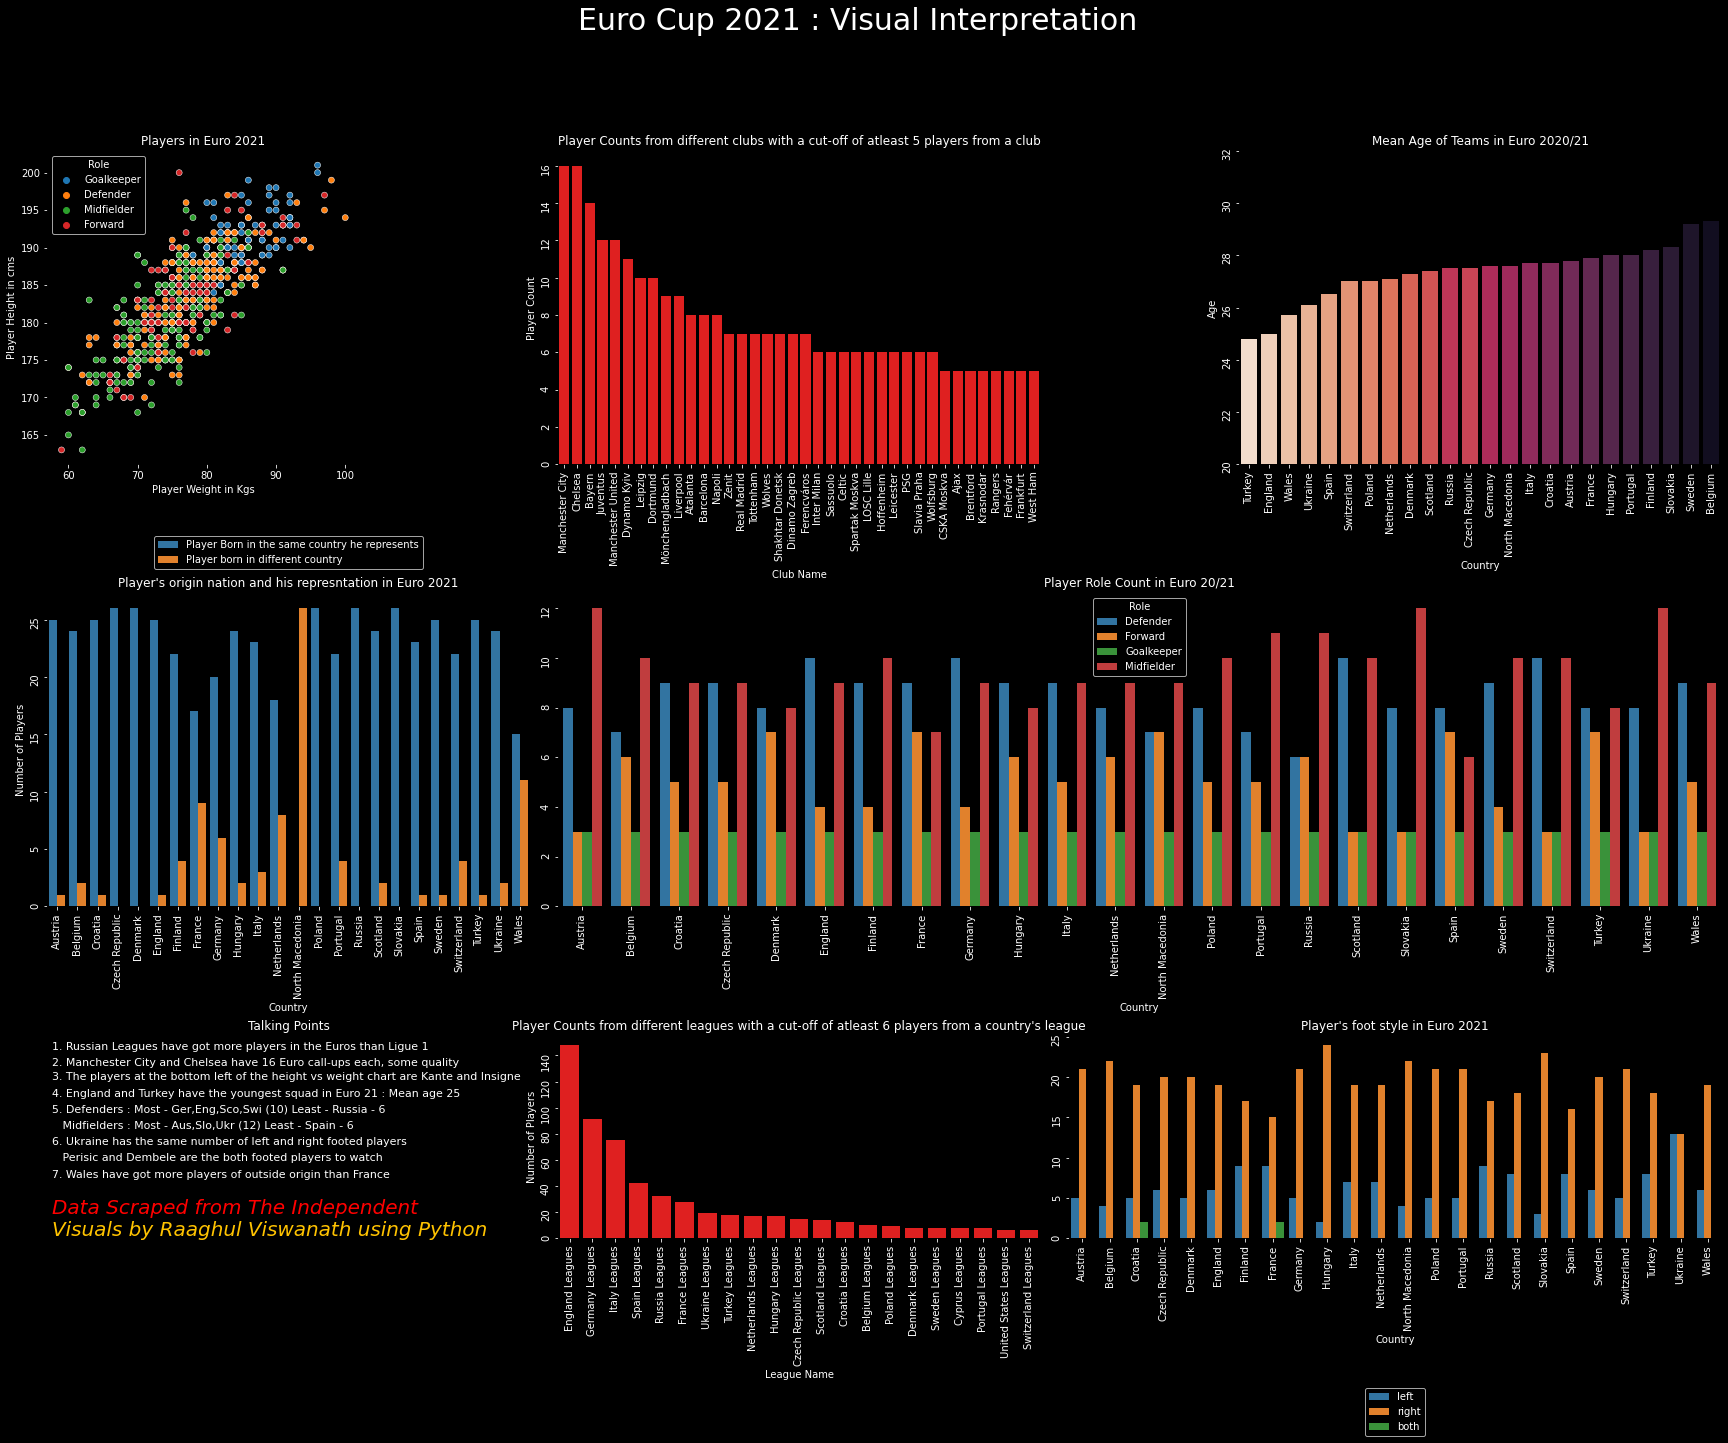

In [2]:
params = {'text.color':'white','axes.facecolor' : 'black','figure.facecolor' : 'black','xtick.color':'white','ytick.color':'white','axes.labelcolor' : 'white'}
plt.rcParams.update(params)
fig = plt.figure(figsize=(30, 20))
ax1 = plt.subplot2grid((10, 10), (0, 0),rowspan= 3,colspan= 2)
ax2 = plt.subplot2grid((10,10),(4,0),colspan= 3,rowspan=3)
ax3 = plt.subplot2grid((10,10),(8,6),rowspan= 4, colspan= 4)
ax4 = plt.subplot2grid((10,10),(0,3),rowspan= 3, colspan= 3)
ax5 = plt.subplot2grid((10,10),(4,3),rowspan= 3, colspan= 7)
ax6 = plt.subplot2grid((10,10),(8,3), colspan= 3,rowspan = 4)
ax7 = plt.subplot2grid((10,10),(0,7),colspan= 3,rowspan = 3)
ax8 = plt.subplot2grid((10,10),(8,0),rowspan= 2,colspan = 3)
mean_age = euro_refined.groupby(['Country'],as_index= False).agg({'Age':'mean'})
mean_age['Age'] = mean_age['Age'].round(1)
sns.barplot(x = 'Country',y= 'Age',data = mean_age.sort_values('Age'),color = 'yellow',palette= colors_from_values(mean_age['Age'],"rocket_r"),ax = ax7)
ax7.set_ylim(20,32)
ax7.tick_params(labelrotation = 90)
ax7.set_title('Mean Age of Teams in Euro 2020/21')
clubs = euro_refined['Club'].value_counts().rename_axis('Club Name').reset_index(name = 'Player Count')
min_count = 5
sns.barplot(x= 'Club Name',y = 'Player Count',data = clubs[clubs['Player Count']>= min_count],color = 'red',ax = ax4)
ax4.tick_params(labelrotation = 90)
ax4.set_title("Player Counts from different clubs with a cut-off of atleast "+ str(min_count)+" players from a club")
sns.scatterplot(y = 'PLY Height',x = 'PLY Weight',data = euro_refined[euro_refined['PLY Weight'] != 0 ],hue = 'Role',ax = ax1)
ax1.set_title('Players in Euro 2021')
ax1.set_xlabel('Player Weight in Kgs')
ax1.set_ylabel('Player Height in cms')
euro_refined['Origin'] = np.where(euro_refined['Country'] == euro_refined['PLY Birth Area'], 'Player Born in the same country he represents','Player born in different country')
origin = euro_refined.groupby(['Country','Origin'],as_index = False).agg({'Name':'count'})
sns.barplot(x = 'Country',y = 'Name',data = origin, hue = 'Origin',ax = ax2)
ax2.set_ylabel('Number of Players')
ax2.tick_params(labelrotation = 90)
ax2.set_title("Player's origin nation and his represntation in Euro 2021")
ax2.legend(loc = 'upper center',bbox_to_anchor = (0.5,1.2))
roles = euro_refined.groupby(['Country','Role'],as_index = False).agg({'Name':'count'})
sns.barplot(x = 'Country',y = 'Name',data = roles, hue = 'Role',ax = ax5)
ax5.set_ylabel('')
ax5.set_title('Player Role Count in Euro 20/21')
#ax5.legend(loc = 'lower center',bbox_to_anchor = (0.5,-.2))
ax5.tick_params(labelrotation = 90)
leagues = euro_refined['Leagues'].value_counts().rename_axis('League Name').reset_index(name = 'Player Count')
min_count = 6
sns.barplot(x= 'League Name',y = 'Player Count',data = leagues[leagues['Player Count']>= min_count],color = 'red',ax = ax6)
ax6.set_title("Player Counts from different leagues with a cut-off of atleast "+ str(min_count)+" players from a country's league")
ax6.tick_params(rotation = 90)
ax6.set_ylabel('Number of Players')
foot = euro_refined.groupby(['Country','PLY Foot'],as_index = False).agg({'Name':'count'})
sns.barplot(x = 'Country',y = 'Name',data = foot, hue = 'PLY Foot',ax = ax3)

ax3.tick_params(labelrotation = 90)
ax3.set_title("Player's foot style in Euro 2021")
ax3.set_ylabel('')
ax3.legend(loc = 'lower center',bbox_to_anchor = (0.5,-1))
ax8.set_title('Talking Points')
ax8.text(0.01,0.93,'1. Russian Leagues have got more players in the Euros than Ligue 1',fontsize = 11)
ax8.text(0.01,0.85,'2. Manchester City and Chelsea have 16 Euro call-ups each, some quality',fontsize = 11)
ax8.text(0.01,0.78,'3. The players at the bottom left of the height vs weight chart are Kante and Insigne',fontsize = 11)
ax8.text(0.01,0.7,'4. England and Turkey have the youngest squad in Euro 21 : Mean age 25',fontsize = 11)
ax8.text(0.01,0.62,'5. Defenders : Most - Ger,Eng,Sco,Swi (10) Least - Russia - 6',fontsize = 11)
ax8.text(0.01,0.54,'   Midfielders : Most - Aus,Slo,Ukr (12) Least - Spain - 6',fontsize = 11)
ax8.text(0.01,0.46,'6. Ukraine has the same number of left and right footed players',fontsize  = 11)
ax8.text(0.01,0.38,'   Perisic and Dembele are the both footed players to watch',fontsize = 11)
ax8.text(0.01,0.3, '7. Wales have got more players of outside origin than France',fontsize = 11)
ax8.text(0.01,0.12,'Data Scraped from The Independent',fontsize = 20, color = 'red',style = 'oblique')
ax8.text(0.01,0.01,'Visuals by Raaghul Viswanath using Python',fontsize = 20,color = '#FFC300',style = 'italic')
ax8.axis('off')
plt.suptitle('Euro Cup 2021 : Visual Interpretation',fontsize = 30)
plt.savefig('Euro21_100_dpi.png',dpi = 100,facecolor = 'black',edgecolor = 'black')
plt.show()
#plt.tight_layout(h_pad= 1.0)